In [3]:
install.packages("scatterplot3d") # Install
install.packages("plot3D")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘misc3d’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(cowplot)
library("plot3D")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

USING HEART RATE AND BLOOD PRESSURE TO PREDICT ST DEPRESSION


Introduction:

ST depression is an abnormality observed on an electrocardiogram (ECG), which measures the electrical activity in hearts. The ST segment is a flat region with minimum voltage change on an ECG which falls between the end of the S wave and the beginning of the T wave as seen in Image 1. On an ECG trace with ST depression, the ST segment is low below the baseline (Image 2). The typical units for this depression are millimetres, and more than 1 mm depression is considered outside of healthy limits [1]. Often, ST depression is a sign of ischemic heart diseases (related to restricted blood flow), such as myocardial ischemia and hypoxia [2]. A study in the Journal of Hypertension found that during ST depression periods, patients’ blood pressures and heart rates were at elevated levels [3]. These findings were corroborated by another study in the Journal of Internal Medicine which confirmed that patients exhibiting ST depression also had higher blood pressure and heart rates compared to their normal values [4]. Due to this observed correlation, we decided to explore whether known heart rate and blood pressure measurements can be used in a regression model to predict a patient’s ST depression value. This project investigated the potential to use patients’ heart rates and blood pressures to predict ST depression using K-nearest neighbours (KNN) multivariable regression. The overall question this model tried to answer is “Can patients’ heart rate and blood pressure data be used to predict their ST depression values?”

Image 1 [4]

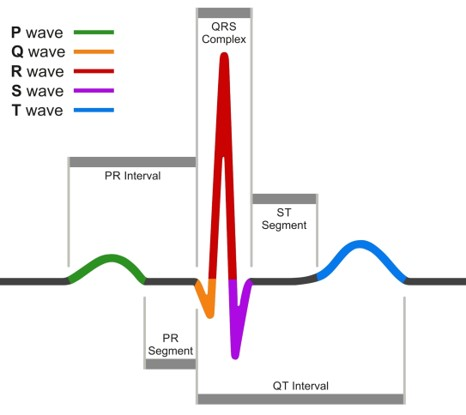

Image 2 [2]

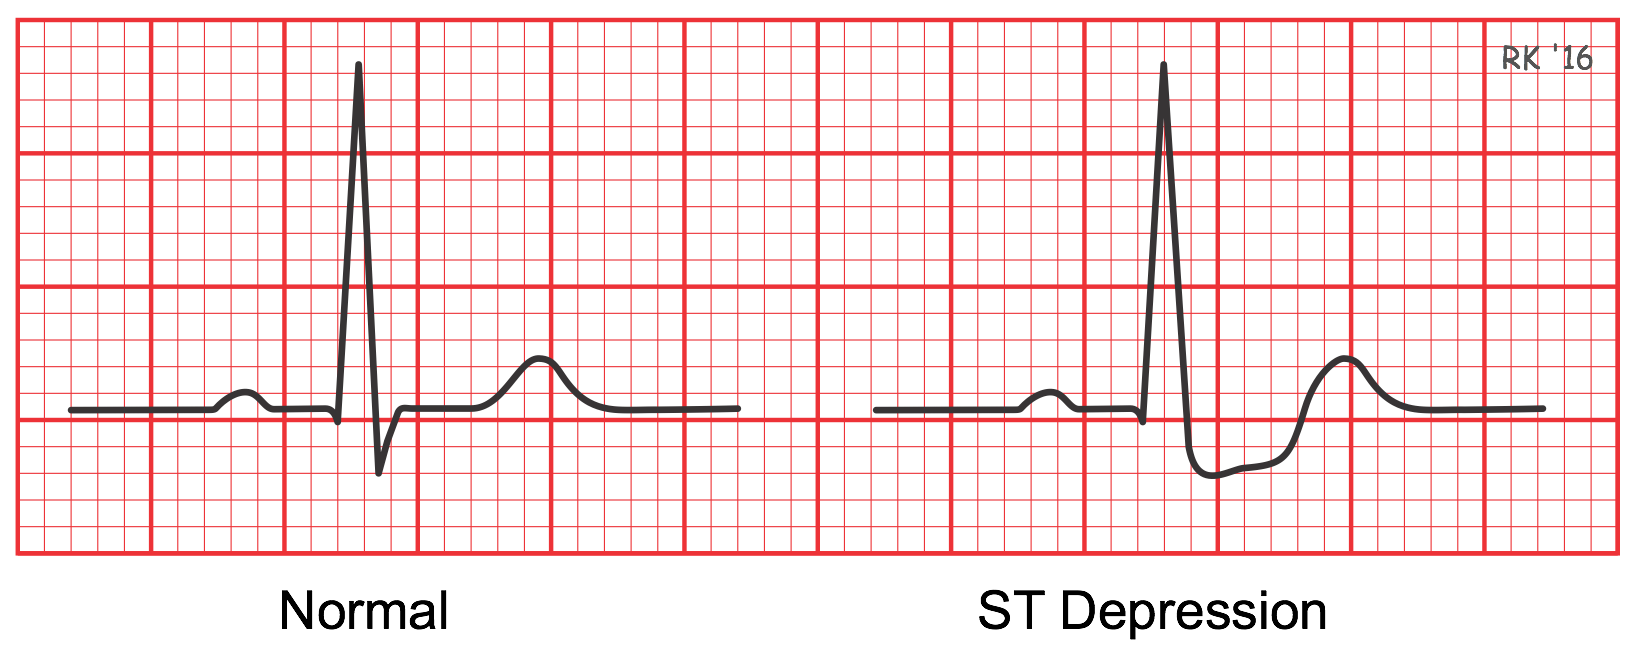

Methods & Results:

To answer our question, we used the “Heart Disease Data Set” from the UCI Machine Learning Repository. The subset of data was collected from the Cleveland Clinic Foundation and includes 14 patient attributes. Within the larger database we chose to use this processed data from Cleveland because this is the only data set that has been used in previous studies and by other researchers. Using this dataset, will perform KNN multivariable regression to predict ST depression values induced by exercise relative to rest (old_peak) based on maximum heart rate achieved (thalach) in BPM and resting blood pressure in mmHg on hospital admission (trestbps).

Initial data wrangling began with tidying the data by adding column names and adjusting for categorical variables to be recognized as such. Next we split the data into training and testing groups with a 75% and 25% split respectively. This split was chosen to maximise training data while leaving enough data for a suitable testing group. To study the training group data, we created an exploratory table (Table 1) which states the number of observations and the mean, maximum, and minimum values for our predictors and predicting class. Table 1 gave us a better understanding of the scale of data we would be working with, and how they compare to each other in this way. To visualise the relationships between ST depression and heart rate/blood pressure, we created two plots. Figure 1a was a scatterplot of ST depression compared to resting blood pressure. There was a slight positive correlation visible, however it appears relatively weak. Figure 1b was a scatterplot of ST depression compared to maximum heart rate, which appears to demonstrate a very weak negative relationship if at all. These plots helped us visualise the correlations between the predictors and predicting variable prior to performing the regression. The weak relationships observed indicated that the predictors may be successful in creating a suitable model, however there were no significantly strong correlations shown in the data.

Armed with the knowledge gained from the exploratory analysis, the next step performed was designing the model. A KNN specification was prepared which instructed the model to perform a regression (heart_spec). The “rectangular” weight function was used to indicate that each neighbour was to have one vote in the regression. As for the number of neighbours, we opted to tune the model in this initial specification to find the ideal k value with the lowest error. A recipe (heart_recipe) was then written to note what variable to predict and which predictor variables to consider. The recipe was written to scale and centre predictor variables when used to ensure one doesn’t influence the model more than the other. In the case of our data, they were on a similar scale initially (as observed in the exploratory Table 1.)The recipe and specification were then combined into a workflow (heart_workflow), however it was not fit to any data yet. Next we tuned our model workflow using 5 fold cross-validation to identify the best value for k between 1-150. A set-seed function was used to ensure the code is reproducible and the random splitting will be consistent each time it is run.The 5 folds were chosen to test k values on multiple subsections of the training data with the goal of getting more accurate average root mean square error (RMSE) for the tested values. The heart_workflow was used to test different k values on the training data by splitting it into mini training and testing groups (the 5 folds represent 5 different splits). The k value with the smallest RMSE was extracted and determined to be 56 neighbours. To double-check this number, we created an RMSE versus neighbours plot and indeed 56 neighbours has the lowest error (Figure 2). The predicted RMSE for 56 neighbours was also stored in Table 2 for future reference.

Given this information, the next step was to write a new specification (heart_spec_best) with 56 neighbours and incorporate that into a new workflow fitted on the training data (heart_train). Predictions of ST depression values (old_peak) were then calculated based on the testing data predictors (heart_predictions). These predicted values were attached to the testing data table, compared to the true values for ST depression, and the test error was extracted. The root mean square prediction error (RMSPE) was determined to be 1.10749 mm. This is just over the RMSE on the training data plus one standard deviation, which was 1.10299 mm. So, the error was slightly higher than expected, but close to the prediction and within two standard deviations. The range of ST depression values is 0 - 5.6 mm (see Table 1), so the RMSPE is approximately one fifth of the maximum value. The average of the ST depression is stated as 1.041485 mm in exploratory Table 1, and according to scientific literature 0-1 mm ST depression is considered normal and healthy [1]. Our relatively large error could therefore change a patient’s ST depression prediction from a healthy range to a dangerous one and vice versa. This high error could make a significant impact on the depression values, so this model is likely not a good one. Figures 3 a and b overlay the ST depression predictions in blue on the actual values in black compared to each predictor. There does not seem to be significant overfitting or underfitting on the curve, however the lack of a clear relationship between the predictors and the predicting variable makes this difficult to gauge. Having more data would help in judging over/underfitting to determine if the predictions are following true trends or rather being too influenced/not influenced enough by the data. 

Discussion:

Through our data analysis, we created a KNN regression model which predicted ST depression values induced by exercise relative to rest (old_peak) using maximum heart rate achieved (thalach) and resting blood pressure on hospital admission (trestbps). The square root mean prediction error on this model when used on the testing data was found to be about 1.107 mm. This error was slightly higher than we predicted and too large for the model to be practical for use in a clinical setting. Therefore, these results indicate that heart rate and blood pressure cannot be used on this data set to accurately predict ST depression values. Based on our literature search, we expected that we would be able to use these values to predict ST depression because higher heart rate and blood pressure were linked to above average depression values. However, this hypothesis was disproved.

In order to improve this model, there are a few directions that could be explored. Increasing the size of the training data could be beneficial, as our training set only had 229 observations. In addition, more predictors could be incorporated into the model to use as much data as possible to refine the ST depression predictions. If a future model was successful in predicting ST depression with a small margin of error, this could be valuable in a clinical setting. For example, using regression to predict ST depression could help with early recognition of potential ST abnormalities for patients who are currently being monitored. Recognizing factors that may indicate underlying heart diseases such as myocardial ischemia could positively impact patients and help those diseases be identified as soon as possible. However, these impacts are reliant on the development of a refined model with better accuracy. One future question raised by this report is which factors could in fact predict ST depression with greater success? Also, does age or sex play a role in ST depression, so could narrowing down our predictors based on these attributes improve the efficacy of the model? Another potential avenue of further research may involve predicting presence of heart diseases based on some or all the predictors available. This classification problem of having a disease or not having a disease may also benefit from using correlated symptoms as predictors. For example, ST depression and resting heart rate may be used to predict cardial ischemia since abnormal measurements often accompany heart diseases [2].


References:

[1]	Svensson, P; Niklasson, U; Ostergren, J. Episodes of ST-segment depression is related to changes in ambulatory blood pressure and heart rate in intermittent claudication. J Intern Med. 2001 Nov;250(5):398-405. doi: 10.1046/j.1365-2796.2001.00899.x. PMID: 11887974.

[2]	 Klabunde, PhD, R. E. (n.d.). Electrophysiological changes during cardiac ischemia. Electrophysiological Changes During Cardiac Ischemia. Retrieved from https://www.cvphysiology.com/CAD/CAD012#:~:text=Although%20ST%20depression%20cannot%20be,acute%20myocardial%20ischema%20and%20hypoxia.
 
[3]	Uen, Sakir; Baulmann, Johannes; Düsing, Rainer; Glänzer, Kilian; Vetter, Hans; Mengden, Thomas. ST-segment depression in hypertensive patients is linked to elevations in blood pressure, pulse pressure and double product by 24-h Cardiotens monitoring. Journal of Hypertension: May 2003 - Volume 21 - Issue 5 - p 977-983. Retrieved from https://journals.lww.com/jhypertension/pages/articleviewer.aspx?year=2003&issue=05000&article=00023&type=Fulltext

[4] 	St segment (adult) – the premier EKG Resource for Medical Professionals – EKG MD – dr. Anthony Kashou. The Premier EKG Resource for Medical Professionals EKG MD Dr Anthony Kashou. (n.d.). Retrieved from https://ekg.md/content/st-segment-adult/ 

[5] 	Dua, D. and Graff, C. (2019). Heart Disease Data Set. UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 



In [5]:
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
heart_data <- read_csv(url, col_names = FALSE)
colnames(heart_data)= c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","old_peak","slope","ca","thal","num") 
heart_data %>% mutate(sex = as_factor(sex),
                      fbs = as_factor(fbs),
                      cp = as_factor(cp),
                      restecg = as_factor(restecg), 
                      exang = as_factor(exang), 
                        slope = as_factor(slope), 
                        thal = as_factor(thal), 
                        num = as_factor (num)) %>%
                    as_tibble()

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,old_peak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


Table 1: This table shows the entire Cleveland data set and all the attributes available. [5]

In [6]:
set.seed(1234)

heart_split <- initial_split(heart_data, prop = 0.75, strata = old_peak)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)


exploratory_table <- summarize(heart_train,
        no._observations =  nrow(heart_train),
        mean_bloodpressure = mean(trestbps),
        min_bloodpressure = min(trestbps),
        max_bloodpressure = max(trestbps),
        mean_heartrate = mean(thalach), 
        min_heartrate = min(thalach),
        max_heartrate = max(thalach),
        mean_old_peak = mean(old_peak),
        min_old_peak = min(old_peak),
        max_old_peak = max(old_peak))
exploratory_table 

no._observations,mean_bloodpressure,min_bloodpressure,max_bloodpressure,mean_heartrate,min_heartrate,max_heartrate,mean_old_peak,min_old_peak,max_old_peak
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
229,132.8166,94,192,149.2271,71,202,1.041485,0,5.6


Table 2: This exploratory table shows the minimum,maximum, and mean values for the predictors of heart rate and blood pressure (trestbps and thalach respectively) and the predicting class of ST depression (old_peak).

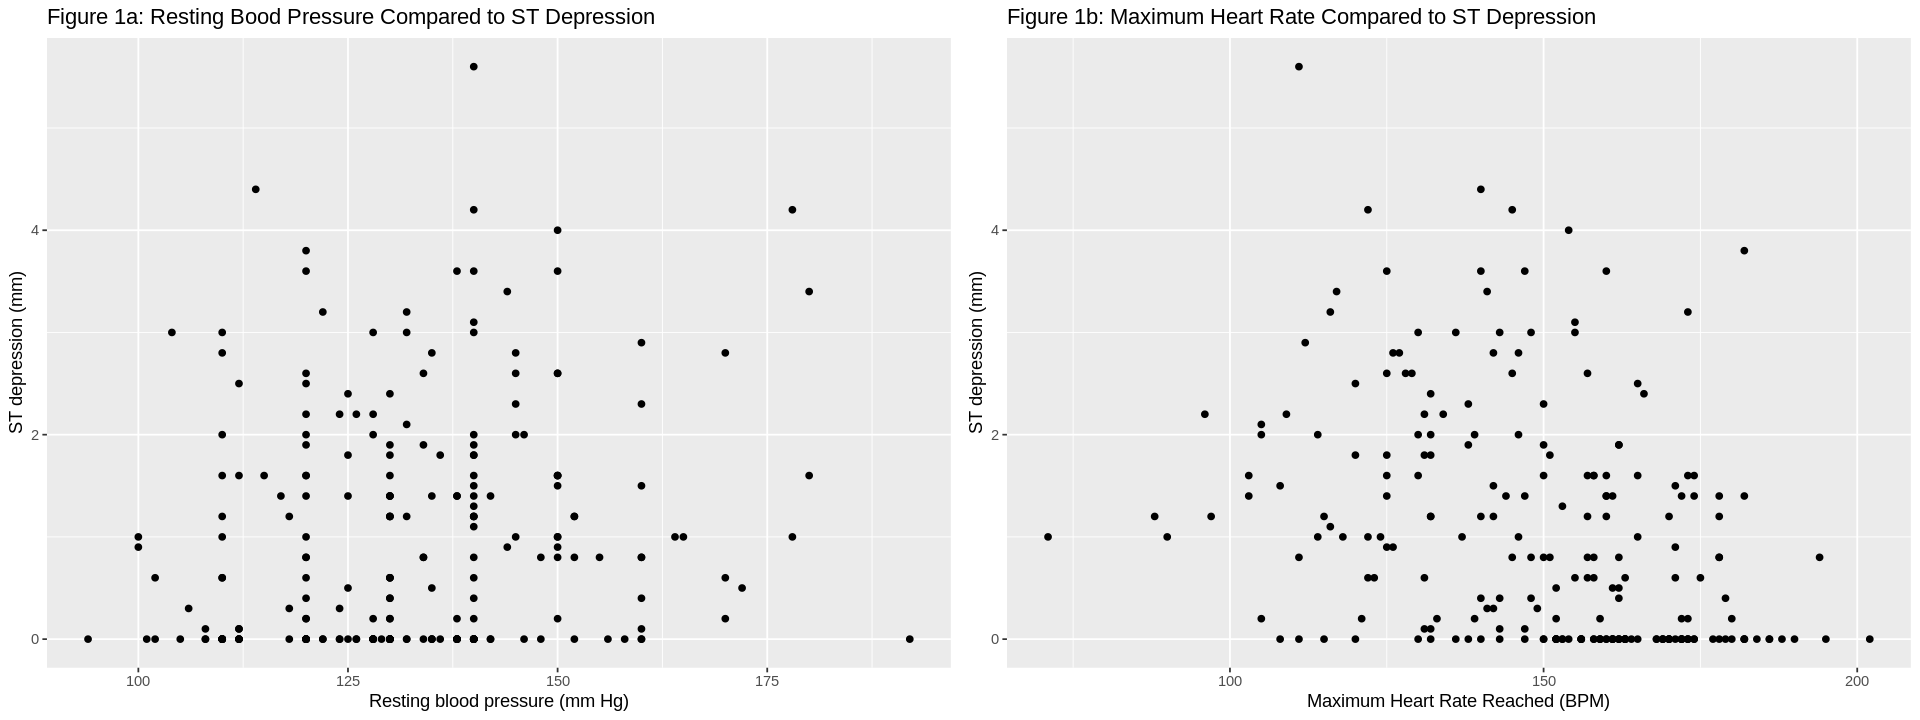

In [18]:
heart_graph <- heart_train %>%
     ggplot(aes(x=trestbps, y= old_peak)) +
         geom_point (stat = 'identity') +
         labs(x = "Resting blood pressure (mm Hg)",y = "ST depression (mm)") +
             ggtitle("Figure 1a: Resting Bood Pressure Compared to ST Depression")

heart_graph_2 <- heart_train %>%
     ggplot(aes(x=thalach, y=old_peak)) +
     geom_point (stat = 'identity') +
     labs(x="Maximum Heart Rate Reached (BPM)", y="ST depression (mm)") +
     ggtitle("Figure 1b: Maximum Heart Rate Compared to ST Depression")

options(repr.plot.width = 16, repr.plot.height = 6)
 plot_grid(heart_graph, heart_graph_2)

Figure 1: 

a) This figure shows the relation between resting blood pressure and ST depression. The correlation between the two is seen to be slightly positive however only to a weak extent. This figure was created to visualise the distribution of data points for reference.

b)This figure shows the relation between maximum heart rate reached and ST depression to help in visualisation of the data distribution. Again, the correlation is very weak however with a slight negative trend.


In [22]:
set.seed(2022)

#Creating a model specification
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("regression") 

#Heart_recipe
heart_recipe <- recipe(old_peak ~ thalach + trestbps, data = heart_train) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())
#heart_recipe

heart_vfold <- vfold_cv(heart_train, v = 5, strata = old_peak)

heart_workflow <- workflow() %>%
    add_recipe(heart_recipe) %>%
    add_model(heart_spec)

#heart_workflow

  
gridvals <- tibble(neighbors = seq(from = 1, to = 150))

heart_results <- heart_workflow %>%
    tune_grid(resamples = heart_vfold, grid = gridvals) %>%
     collect_metrics() 


best_k <- heart_results %>%
   filter(.metric == "rmse") %>%
     arrange(mean) %>%     
     slice(1) %>%
      select(neighbors) %>%
      pull()
 best_k

rmse_56 <- heart_results %>%
    filter(neighbors == "56")
rmse_56

rmse_values <- heart_results %>% 
       filter(.metric == "rmse")


[1] 56

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
56,rmse,standard,1.0651676,5,0.03782465,Model056
56,rsq,standard,0.1589251,5,0.03397294,Model056


Table 3: This table shows the determined best number of neighbours k (56) in relation to its RMSE and error.

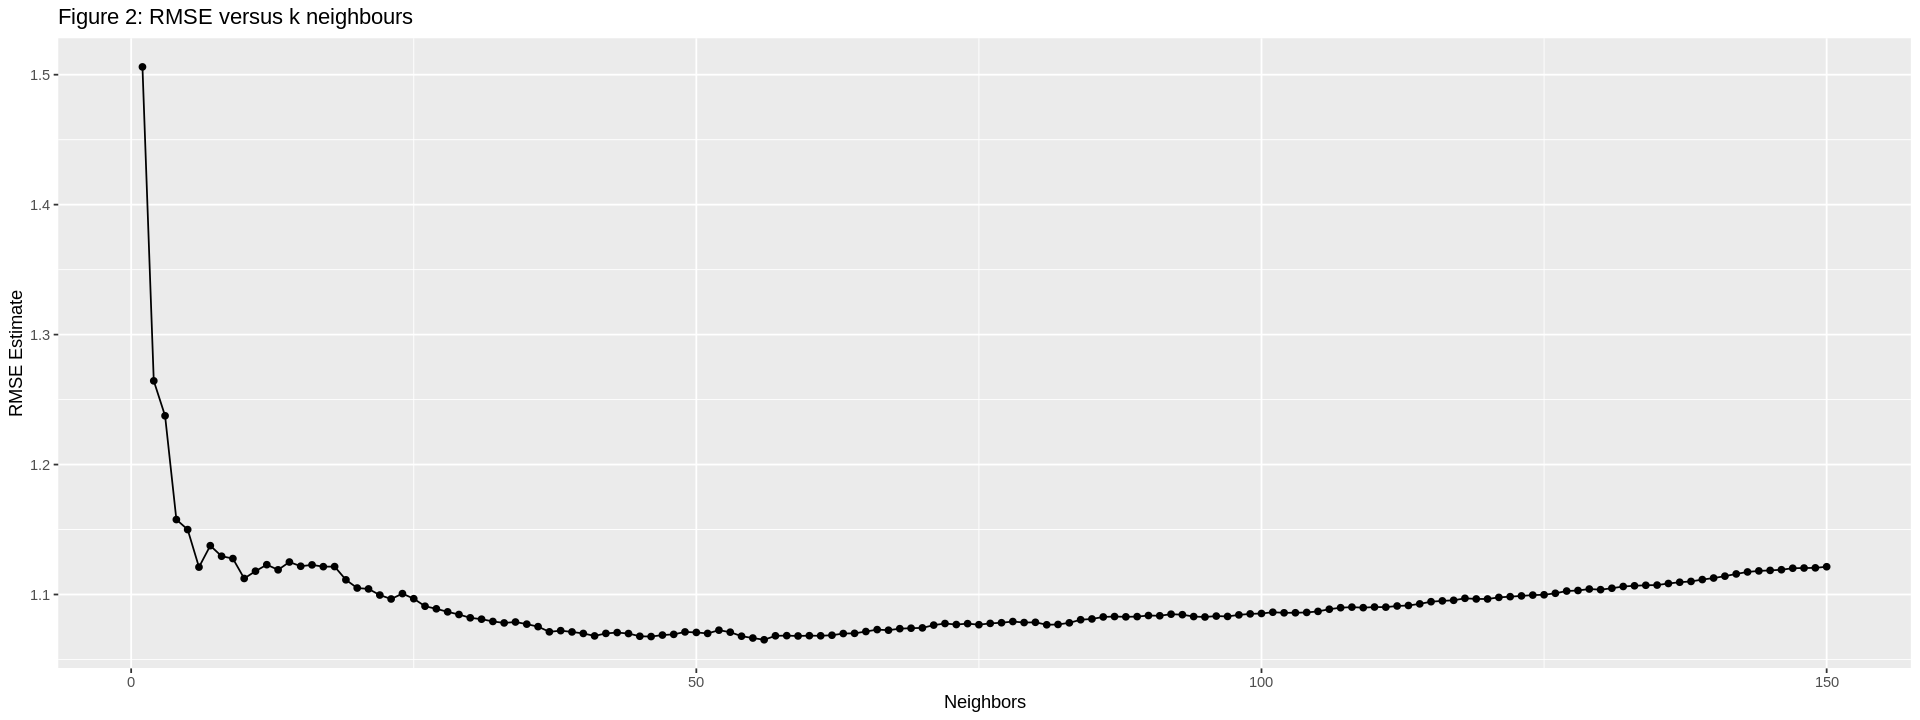

In [21]:
rmse_versus_k <- ggplot(rmse_values, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "RMSE Estimate") +
    ggtitle("Figure 2: RMSE versus k neighbours")
rmse_versus_k


Figure 2: This figure shows how RMSE varies with the number of neighbours, k. This allows for a visualisation of where the best number of neighbours may lie and aids in choosing the correct number to minimise RMSE.


In [9]:

#Testing on test data

heart_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>% 
       set_engine("kknn") %>%
       set_mode("regression") 

heart_fit <- workflow() %>%
  add_recipe(heart_recipe) %>%
  add_model(heart_spec_best) %>%
  fit(data = heart_train)

heart_predictions <- heart_fit %>%
  predict(heart_test) %>%
  bind_cols(heart_test)

heart_metrics<- metrics(heart_predictions, truth = old_peak, estimate = .pred) %>%
                     filter(.metric == 'rmse')
heart_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.10749


Table 4: This table shows the error related to the model’s prediction accuracy (RMSE), as represented by .estimate.

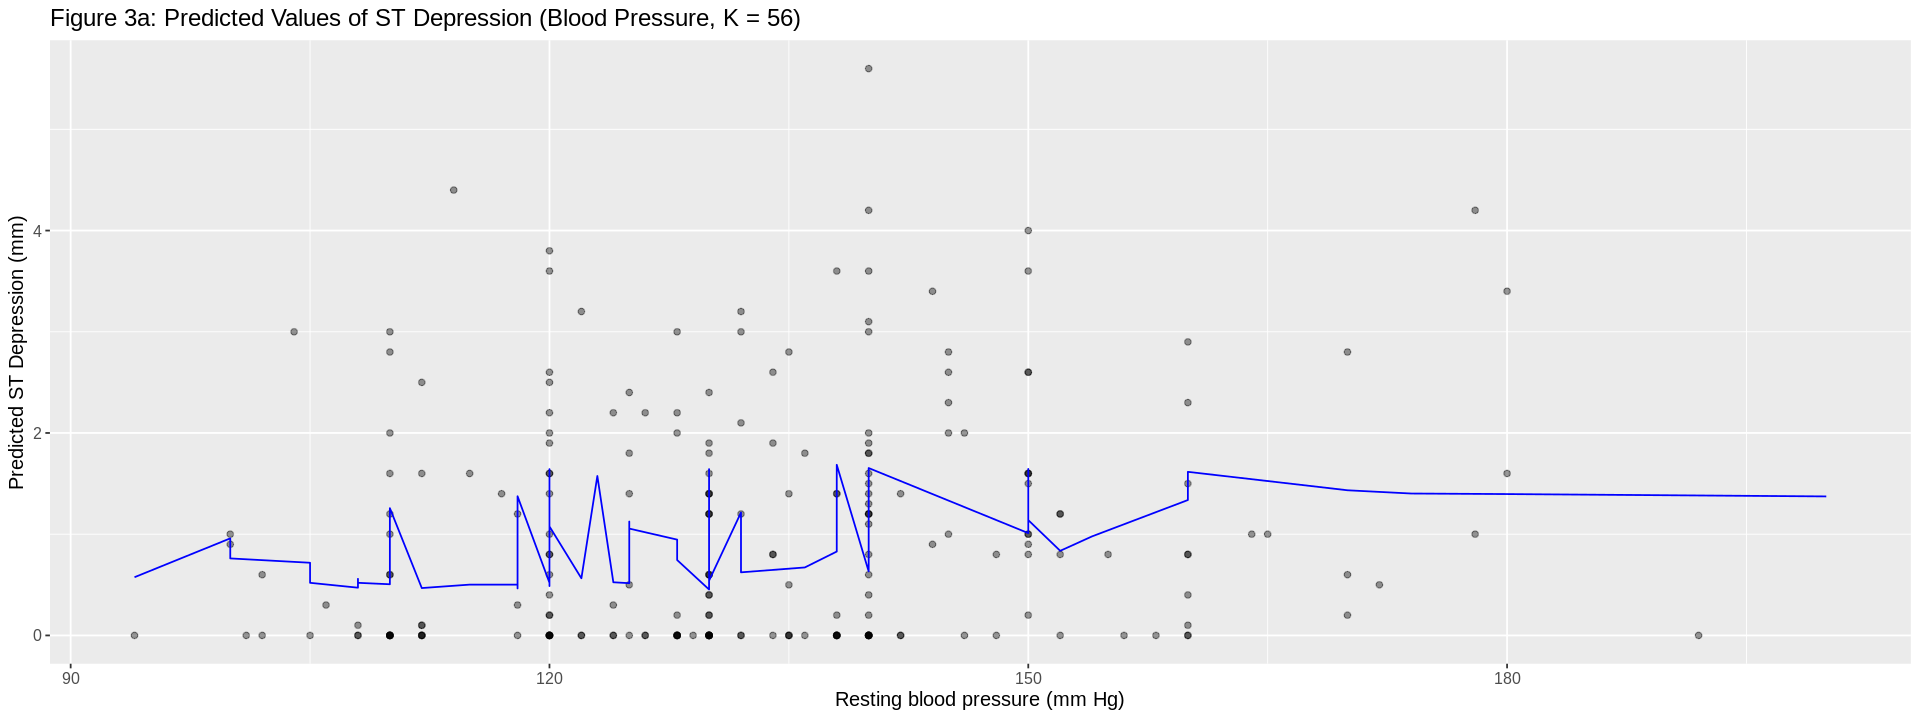

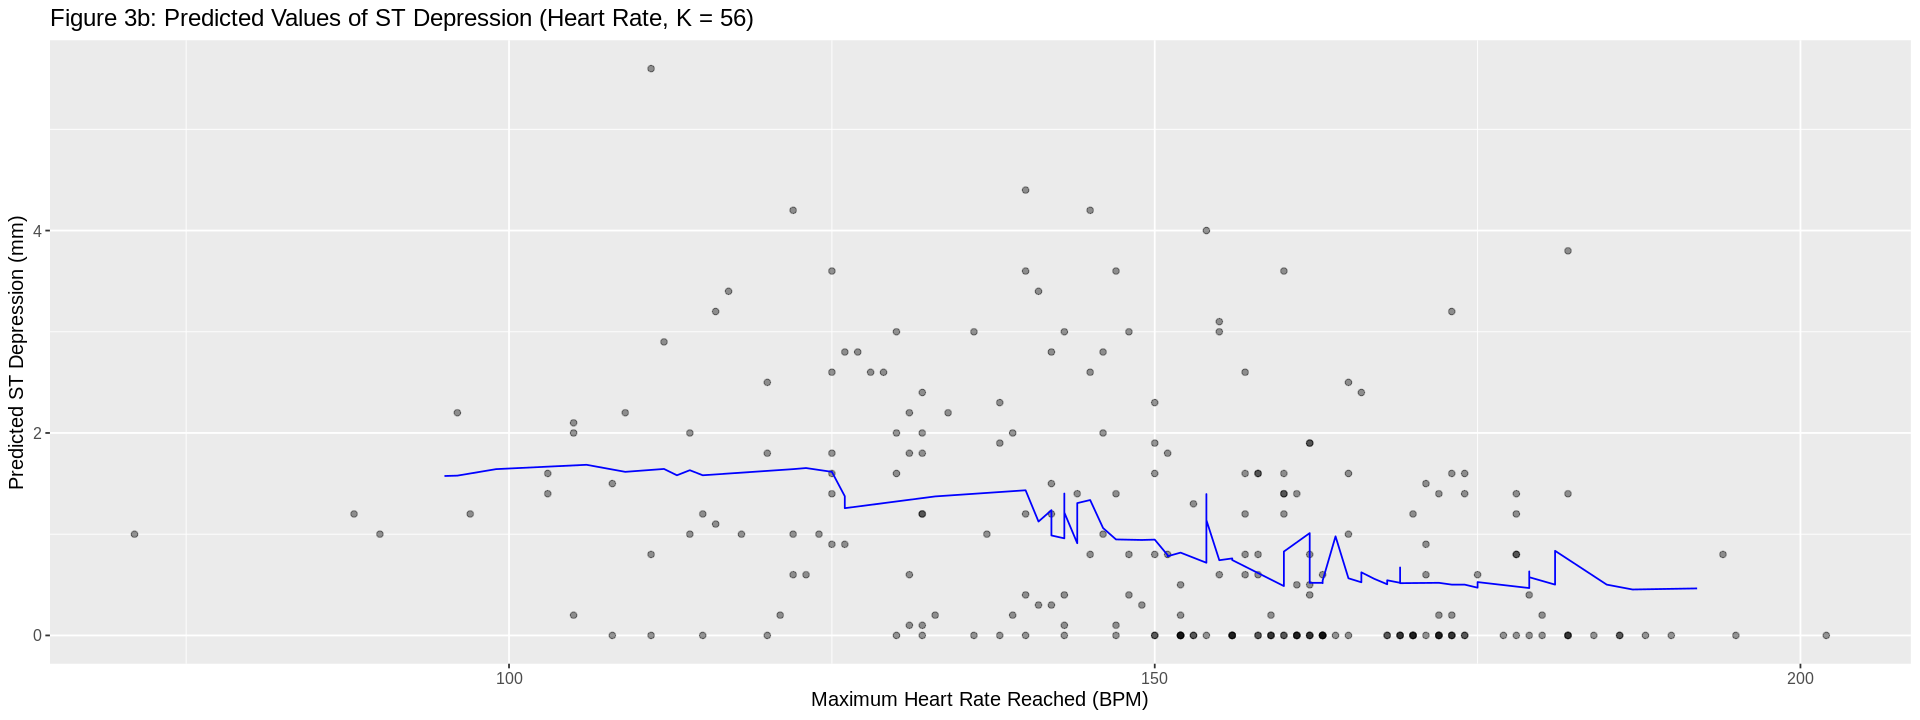

In [20]:
#Predictions graphs

plot_final_trestbps <- ggplot(heart_train, aes(x = trestbps, y = old_peak)) +
  geom_point(alpha = 0.4) +
  geom_line(data = heart_predictions, 
            mapping = aes(x = trestbps, y = .pred), 
            color = "blue") +
  xlab("Resting blood pressure (mm Hg)") +
  ylab("Predicted ST Depression (mm)") +
  ggtitle("Figure 3a: Predicted Values of ST Depression (Blood Pressure, K = 56)") + 
  theme(text = element_text(size = 12))

plot_final_thalach <- ggplot(heart_train, aes(x = thalach, y = old_peak)) +
  geom_point(alpha = 0.4) +
  geom_line(data = heart_predictions, 
            mapping = aes(x = thalach, y = .pred), 
            color = "blue") +
  xlab("Maximum Heart Rate Reached (BPM)") +
  ylab("Predicted ST Depression (mm)") +
  ggtitle("Figure 3b: Predicted Values of ST Depression (Heart Rate, K = 56)") + 
  theme(text = element_text(size = 12))

plot_final_trestbps
plot_final_thalach

Figure 3: 

a) This figure shows the relation between the model’s predicted values and the true values where resting blood pressure and ST depression are compared. This figure aids in visualisation of model accuracy and in this case represents a model that is not very accurate.

b) This figure shows the relation between the model’s predicted values and the true values where maximum heart rate reached and ST depression are compared. This figure was used to visualise how effective the model is at predicting and here, again, shows a model that is not very accurate.
